# k-vizinhos mais próximos (KNN) e Árvores de decisão

* Tópicos abordados:
    * Problemas de classificação em aprendizagem de máquina;
    * Pré-processamento de dados;
    * k-vizinhos mais próximos (KNN);
    * Árvores de decisão;
    * Métricas para avaliação de modelos:
        * Acurácia
        * F1
        * Precisão
        * Revocação

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
pd.options.display.max_columns = None

In [ ]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

In [ ]:
mpl.rcParams['figure.dpi'] = 100

## 1. Classificação binária

### 1.1) Base de dados: Titanic

In [ ]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

In [ ]:
titanic_df.dropna(subset=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], inplace=True)
titanic_df.shape

In [ ]:
titanic_df.drop(columns=['who', 'deck', 'embark_town', 
                         'alive', 'embarked', 'class', 
                         'alone', 'adult_male'], inplace=True)
titanic_df.head()

In [ ]:
ax = sns.pairplot(titanic_df, hue='survived', height=3)
plt.show()

#### Pré-processamento dos dados

* [LabelEncoder](http://https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder)

In [ ]:
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(list(titanic_df['sex'].values))

titanic_df.head()

In [ ]:
ax = sns.pairplot(titanic_df, hue='survived', height=3)
plt.show()

In [ ]:
X = titanic_df.loc[:,'pclass':'fare'].to_numpy()
y = titanic_df['survived'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify = y,
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

### 1.2) k-vizinhos mais próximos (KNN)

* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train, y_train)

#### Avaliação do modelo

* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score)
* [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)
* [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html?highlight=confusionmatrixdisplay#sklearn.metrics.ConfusionMatrixDisplay)

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, knn_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

In [ ]:
print(classification_report(y_test, knn_model.predict(X_test), target_names=['No', 'Yes']))

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pd.Series(knn_model.classes_).map({0: 'No', 1: 'Yes'}))

disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

In [ ]:
explainer = shap.Explainer(knn_model.predict, X_test)
shap_values = explainer(X_train)

In [ ]:
plt.figure(figsize = (15,8))

ax = shap.summary_plot(shap_values, 
                       titanic_df.columns,
                       plot_type='bar')

plt.show()

### 1.3) Árvores de decisão

* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier)
* [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=3,
                                    min_samples_split=2,
                                    random_state=0)

tree_model.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(18,10))

ax = plot_tree(tree_model,
               max_depth=3,
               fontsize=12,
               feature_names=titanic_df.columns[1:])

plt.show()

#### Avaliação do modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, tree_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

In [ ]:
print(classification_report(y_test, tree_model.predict(X_test), target_names=['No', 'Yes']))

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

cm = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pd.Series(tree_model.classes_).map({0: 'No', 1: 'Yes'}))

disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

In [ ]:
explainer = shap.Explainer(tree_model.predict, X_test)
shap_values = explainer(X_train)

In [ ]:
plt.figure(figsize = (15,8))

ax = shap.summary_plot(shap_values, 
                       titanic_df.columns,
                       plot_type='bar')

plt.show()

---

### 1.4) Desafio: Aplicativos Android malignos e benignos

* Fonte de dados: [Android Botnet dataset](https://www.unb.ca/cic/datasets/android-botnet.html)

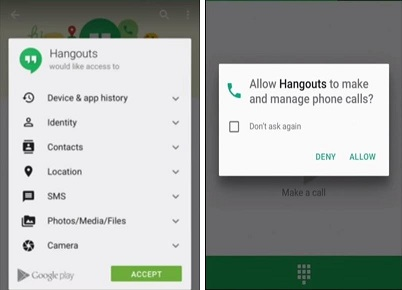

In [ ]:
android_malwares_df = pd.read_csv('../input/android-apps-malware-and-benign/benign_and_malware_android_applications.csv')
android_malwares_df.head()

In [ ]:
android_malwares_df.shape

In [ ]:
plt.figure(figsize = (8,5))

ax = sns.countplot(x = 'FAMILY', 
                   data = android_malwares_df, 
                   order = android_malwares_df['FAMILY'].value_counts().index)

ax.set_title('Aplicativos Android')
ax.set_xlabel('Tipo')
ax.set_ylabel('Qtd. de aplicativos')

plt.show()

In [ ]:
X = android_malwares_df.drop(['FAMILY'], axis = 1).to_numpy()
y = android_malwares_df['FAMILY'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify = y,
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

In [ ]:
### Continuação ###

## 2. Classificação multiclasse

### 2.1) Base de dados: Iris

In [ ]:
iris_data = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris_data['data'], 
                       columns=iris_data['feature_names'])

In [ ]:
iris_df['TYPE'] =  iris_data['target']

In [ ]:
iris_df['SPC'] = iris_df['TYPE'].map({0: 'Iris-Setosa', 
                                      1: 'Iris-Versicolour',
                                      2: 'Iris-Virginica'})

In [ ]:
iris_df.head()

In [ ]:
ax = sns.pairplot(iris_df.drop(columns=['TYPE']), hue='SPC', height=3)

plt.show()

In [ ]:
X = iris_df.loc[:,'sepal length (cm)':'petal width (cm)'].to_numpy()
y = iris_df['TYPE'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

### 2.2) k-vizinhos mais próximos (KNN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

#### Avaliação do modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, knn_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

In [ ]:
print(classification_report(y_test, knn_model.predict(X_test), target_names=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']))

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pd.Series(knn_model.classes_).map({0: 'Iris-Setosa', 1: 'Iris-Versicolour',2: 'Iris-Virginica'}))

disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

### 2.3) Árvores de decisão

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=10,
                                    min_samples_split=4,
                                    random_state=0)

tree_model.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(25,10))

ax = plot_tree(tree_model,
               max_depth=3,
               fontsize=12,
               feature_names=iris_df.columns[:-1])

plt.show()

#### Avaliação do modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, tree_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

In [ ]:
print(classification_report(y_test, tree_model.predict(X_test), target_names=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']))

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

cm = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pd.Series(tree_model.classes_).map({0: 'Iris-Setosa', 1: 'Iris-Versicolour',2: 'Iris-Virginica'}))

disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

---

### 2.4) Base de dados: Wine

In [ ]:
wine_data = load_wine()

In [ ]:
print(wine_data.DESCR)

In [ ]:
wine_df = pd.DataFrame(wine_data['data'], 
                       columns=wine_data['feature_names'])
wine_df['TYPE'] =  wine_data['target']
wine_df.head()

In [ ]:
X = wine_df.loc[:,'alcohol':'proline'].to_numpy()
y = wine_df['TYPE'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

### 2.5) k-vizinhos mais próximos (KNN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train, y_train)

#### Avaliação do modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, knn_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

In [ ]:
print(classification_report(y_test, knn_model.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pd.Series(knn_model.classes_))

disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

### 2.6) Árvores de decisão

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=10,
                                    min_samples_split=4,
                                    random_state=0)

tree_model.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(25,10))

ax = plot_tree(tree_model,
               max_depth=3,
               fontsize=12,
               feature_names=wine_df.columns[:-1])

plt.show()

#### Avaliação do modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, tree_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

In [ ]:
print(classification_report(y_test, tree_model.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

cm = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pd.Series(tree_model.classes_))

disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

---

### 2.7) Desafio: Famílias de Android Botnets

* Fonte de dados: [Android Botnet dataset](https://www.unb.ca/cic/datasets/android-botnet.html)

In [ ]:
android_families_df = pd.read_csv('../input/android-apps-malware-and-benign/malware_families.csv')
android_families_df.head()

In [ ]:
android_families_df.shape

In [ ]:
plt.figure(figsize = (20,5))

ax = sns.countplot(x = 'FAMILY', 
                   data = android_families_df, 
                   order = android_families_df['FAMILY'].value_counts().index)

ax.set_title('Aplicativos Android')
ax.set_xlabel('Família de Malware')
ax.set_ylabel('Qtd. de aplicativos')

plt.show()

In [ ]:
X = android_families_df.drop(['FAMILY'], axis = 1).to_numpy()
y = android_families_df['FAMILY'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

In [ ]:
### Continuação ###